In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
# pip3 install opencv-python
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter
from keras_preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

import tensorflow as tf
# import tensorflow_addons as tfa
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet

from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.resnet import ResNet50

from tensorflow.keras.utils import load_img, img_to_array, array_to_img

## image size variation

/content/data/The IQ-OTHNCCD lung cancer dataset/Bengin cases
['Bengin case (119).jpg', 'Bengin case (89).jpg', 'Bengin case (19).jpg', 'Bengin case (7).jpg', 'Bengin case (53).jpg', 'Bengin case (109).jpg', 'Bengin case (66).jpg', 'Bengin case (54).jpg', 'Bengin case (25).jpg', 'Bengin case (95).jpg', 'Bengin case (102).jpg', 'Bengin case (4).jpg', 'Bengin case (101).jpg', 'Bengin case (2).jpg', 'Bengin case (9).jpg', 'Bengin case (28).jpg', 'Bengin case (13).jpg', 'Bengin case (91).jpg', 'Bengin case (117).jpg', 'Bengin case (69).jpg', 'Bengin case (112).jpg', 'Bengin case (61).jpg', 'Bengin case (56).jpg', 'Bengin case (108).jpg', 'Bengin case (59).jpg', 'Bengin case (1).jpg', 'Bengin case (3).jpg', 'Bengin case (15).jpg', 'Bengin case (79).jpg', 'Bengin case (90).jpg', 'Bengin case (120).jpg', 'Bengin case (105).jpg', 'Bengin case (46).jpg', 'Bengin case (37).jpg', 'Bengin case (6).jpg', 'Bengin case (5).jpg', 'Bengin case (48).jpg', 'Bengin case (106).jpg', 'Bengin case (71).jpg',

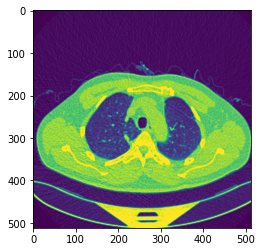

Malignant cases


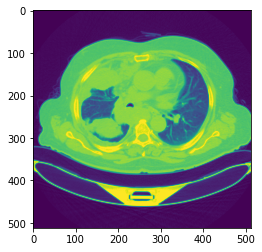

Normal cases


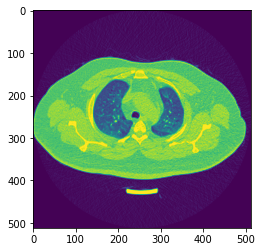

In [8]:
directory = '/content/data/The IQ-OTHNCCD lung cancer dataset'

categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

size_data = {}
for i in categories:
    path = os.path.join(directory, i)
    print(path)
    directories = os.listdir(path)
    print(directories)
    class_num = categories.index(i)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1

    size_data[i] = temp_dict

print(size_data)

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

# Preprocessing and Testing

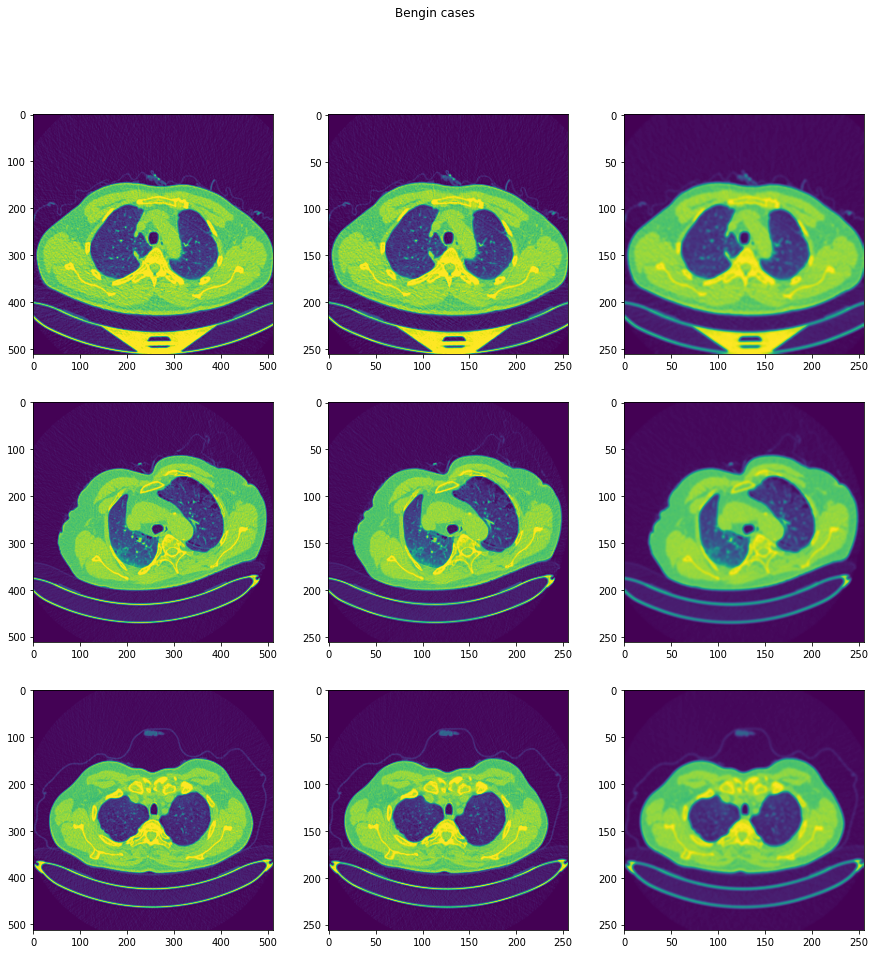

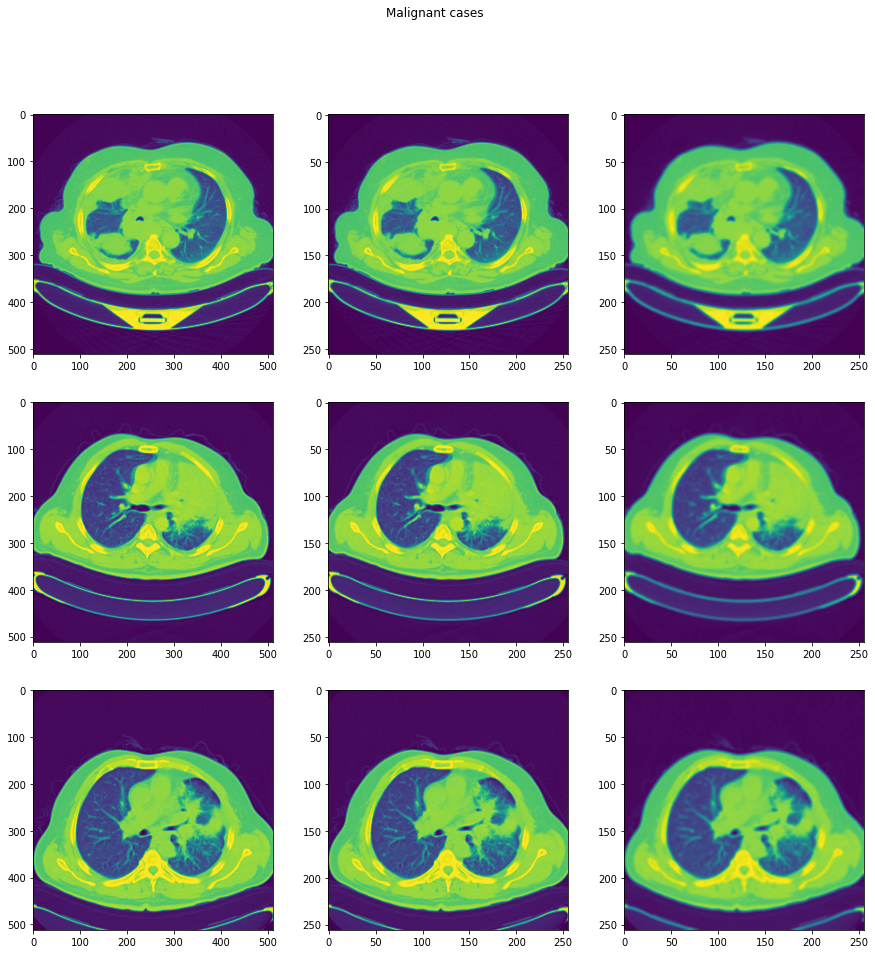

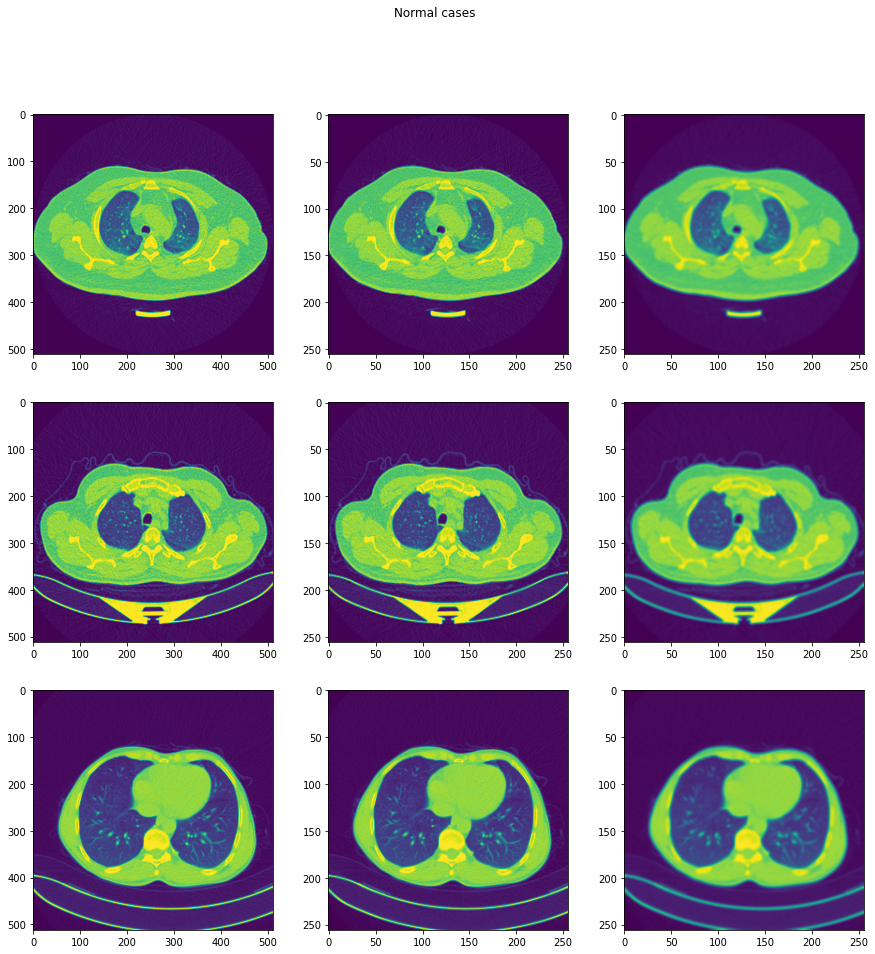

In [9]:
img_size = 256
for i in categories:
    cnt, samples = 0, 3
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))
    fig.suptitle(i)

    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)

        img0 = cv2.resize(img, (img_size, img_size))
        img1 = cv2.GaussianBlur(img0, (5, 5), 0)

        ax[cnt, 0].imshow(img)
        ax[cnt, 1].imshow(img0)
        ax[cnt, 2].imshow(img1)
        cnt += 1
        if cnt == samples:
            break

    plt.show()

# Data preparation

In [10]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])

random.shuffle(data)

X, y = [], []
for feature, label in data:
    X = np.append(X, feature)
    y = np.append(y, label)
    print('X length:', len(X))
    print('y counts:', Counter(y))

    # normalize
    X = np.array(X).reshape(-1, img_size, img_size, 1)
    X = X / 255.0
    y = np.array(y)

X length: 65536
y counts: Counter({2.0: 1})
X length: 131072
y counts: Counter({2.0: 2})
X length: 196608
y counts: Counter({2.0: 3})
X length: 262144
y counts: Counter({2.0: 3, 1.0: 1})
X length: 327680
y counts: Counter({2.0: 3, 1.0: 2})
X length: 393216
y counts: Counter({2.0: 3, 1.0: 3})
X length: 458752
y counts: Counter({2.0: 3, 1.0: 3, 0.0: 1})
X length: 524288
y counts: Counter({2.0: 4, 1.0: 3, 0.0: 1})
X length: 589824
y counts: Counter({2.0: 5, 1.0: 3, 0.0: 1})
X length: 655360
y counts: Counter({2.0: 5, 1.0: 4, 0.0: 1})
X length: 720896
y counts: Counter({2.0: 6, 1.0: 4, 0.0: 1})
X length: 786432
y counts: Counter({2.0: 7, 1.0: 4, 0.0: 1})
X length: 851968
y counts: Counter({2.0: 8, 1.0: 4, 0.0: 1})
X length: 917504
y counts: Counter({2.0: 8, 1.0: 5, 0.0: 1})
X length: 983040
y counts: Counter({2.0: 8, 1.0: 6, 0.0: 1})
X length: 1048576
y counts: Counter({2.0: 9, 1.0: 6, 0.0: 1})
X length: 1114112
y counts: Counter({2.0: 10, 1.0: 6, 0.0: 1})
X length: 1179648
y counts: Count

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

822 (822, 256, 256, 1)
275 (275, 256, 256, 1)


In [12]:
print(Counter(y_train), Counter(y_valid))

Counter({1.0: 420, 2.0: 312, 0.0: 90}) Counter({1.0: 141, 2.0: 104, 0.0: 30})


In [13]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

822 (822, 256, 256, 1)
822 (822, 65536)


In [14]:
print('Before SMOTE:', Counter(y_train))
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

Before SMOTE: Counter({1.0: 420, 2.0: 312, 0.0: 90})
After SMOTE: Counter({2.0: 420, 1.0: 420, 0.0: 420})


In [15]:
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

822 (822, 256, 256, 1)
1260 (1260, 256, 256, 1)


### Model with SMOTE data

In [16]:
model1 = Sequential()

model1.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(16))
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      640       
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [17]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model1.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
158/158 [==============================] - 203s 1s/step - loss: 1.0985 - accuracy: 0.3135 - val_loss: 1.0988 - val_accuracy: 0.3782
Epoch 2/10
158/158 [==============================] - 180s 1s/step - loss: 1.0982 - accuracy: 0.3111 - val_loss: 1.0972 - val_accuracy: 0.3782
Epoch 3/10
158/158 [==============================] - 179s 1s/step - loss: 1.0980 - accuracy: 0.3135 - val_loss: 1.1004 - val_accuracy: 0.1091
Epoch 4/10
158/158 [==============================] - 182s 1s/step - loss: 1.0982 - accuracy: 0.3087 - val_loss: 1.0987 - val_accuracy: 0.1091
Epoch 5/10
158/158 [==============================] - 178s 1s/step - loss: 1.0980 - accuracy: 0.3278 - val_loss: 1.1009 - val_accuracy: 0.1091
Epoch 6/10
158/158 [==============================] - 178s 1s/step - loss: 1.0981 - accuracy: 0.3238 - val_loss: 1.0992 - val_accuracy: 0.3782
Epoch 7/10
158/158 [==============================] - 179s 1s/step - loss: 1.0981 - accuracy: 0.3246 - val_loss: 1.0988 - val_accuracy: 0.3782

### prediction results

In [20]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 9s 938ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        30
         1.0       0.51      1.00      0.68       141
         2.0       0.00      0.00      0.00       104

    accuracy                           0.51       275
   macro avg       0.17      0.33      0.23       275
weighted avg       0.26      0.51      0.35       275

[[  0  30   0]
 [  0 141   0]
 [  0 104   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


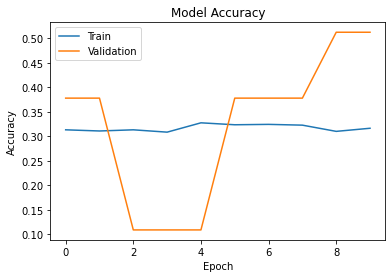

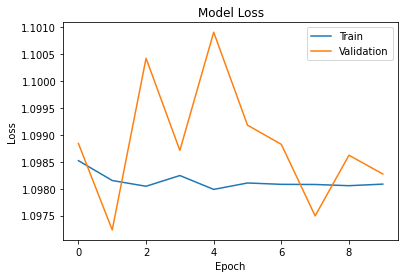

In [21]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Model - class weighted approach

In [22]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(16))
model2.add(Dense(3, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 activation_1 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 246016)           

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}

In [ ]:
history = model2.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_valid, y_valid), class_weight=new_weights)

### prediction results

In [23]:
y_pred = model2.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 9s 958ms/step
              precision    recall  f1-score   support

         0.0       0.11      1.00      0.20        30
         1.0       0.00      0.00      0.00       141
         2.0       0.00      0.00      0.00       104

    accuracy                           0.11       275
   macro avg       0.04      0.33      0.07       275
weighted avg       0.01      0.11      0.02       275

[[ 30   0   0]
 [141   0   0]
 [104   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


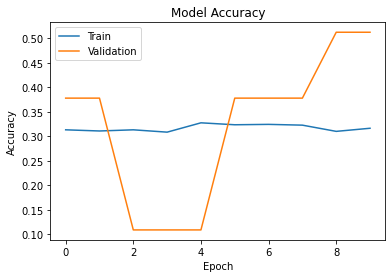

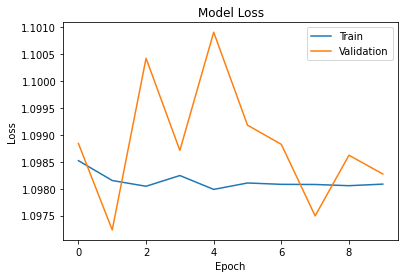

In [24]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Data Augmentation

In [27]:
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
val_datagen = ImageDataGenerator()

In [28]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=8)
val_generator = val_datagen.flow(X_valid, y_valid, batch_size=8)

In [29]:
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(16))
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 activation_2 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 246016)           

In [30]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model3.fit_generator(train_generator, epochs=5, validation_data=val_generator, class_weight=new_weights)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


103/103 [==============================] - 122s 1s/step - loss: 1.1194 - accuracy: 0.2032 - val_loss: 1.0934 - val_accuracy: 0.3782
Epoch 2/5
103/103 [==============================] - 122s 1s/step - loss: 1.0985 - accuracy: 0.3516 - val_loss: 1.0958 - val_accuracy: 0.3782
Epoch 3/5
103/103 [==============================] - 120s 1s/step - loss: 1.0983 - accuracy: 0.3808 - val_loss: 1.0971 - val_accuracy: 0.3782
Epoch 4/5
103/103 [==============================] - 120s 1s/step - loss: 1.0985 - accuracy: 0.3017 - val_loss: 1.0953 - val_accuracy: 0.3782
Epoch 5/5
103/103 [==============================] - 121s 1s/step - loss: 1.0984 - accuracy: 0.1800 - val_loss: 1.0965 - val_accuracy: 0.3782


In [34]:
y_pred = model3.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 9s 951ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        30
         1.0       0.00      0.00      0.00       141
         2.0       0.38      1.00      0.55       104

    accuracy                           0.38       275
   macro avg       0.13      0.33      0.18       275
weighted avg       0.14      0.38      0.21       275

[[  0   0  30]
 [  0   0 141]
 [  0   0 104]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
